# HR Employee Attrition Analytics
# 1.Introduction
This project is a self-learning data science project where i applied machine learning techniques to study the key drivers of employee attrition. Dataset used for employee attrition analysis and modeling in this project is from IBM Watson Analytics Sample Data - [HR Employee Attrition & Performance ](https://community.ibm.com/community/user/home)which contains employee data with various information such as personal background, position and employment information etc. with 1,470 data points.


Attrition rate and its contributing factors is one of the most commonly studied topics in Human Resource Management. Although some staff turnover is inevitable in any company, a high attrition rate usually comes with significant financial and time cost to employers. Recruitment, hiring and training of new employees all involve financial costs and a new employee may not be immediately productive in terms of creating profit. The amount of time spent to interview and find a replacement, and the loss of productivity for several months while the new employee gets accustomed to the new role, are indirect costs to the company. These costs can significantly increase if executive-level or highest-paid employees are to be replaced. As such, the costs of replacing employees for most companies are often very significant.An unusually high employee attrition rate is also considered indicative of problems within the company. Uncompetitive pay scales, micromanagement, ineffective human resource management (HRM) practices and unreasonable expectations can all lead to unacceptable levels of staff turnover. Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as possibly planning new hiring in advance.


One of the key challenges in employee attrition analysis has been the lack of systematic quantitative analysis techniques for accurate insights and predictions. Now with machine learning as a powerful tool, the relationship between employee attrition and different contributing factors such as work-life-balance, employee's joblevel, monthly income, age etc. can be quantitively measured, providing concrete evidence for analysis of staff turnover and design of employee rentention plans. 

# 2.Dataset Analysis and Visualization

In [234]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [235]:
# load HR dataset downloaded from IBM Watson Analytics Sample Data to Google Colab
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (3).csv


In [236]:
import io

#open the csv as a pandas dataframe  
df = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-HR-Employee-Attrition.csv']))
print("The shape of dataset is: " + str(df.shape))


The shape of dataset is: (1470, 35)


In [237]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [238]:
#columns of the dataset
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [239]:
#datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [240]:
# check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [241]:
# summary statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


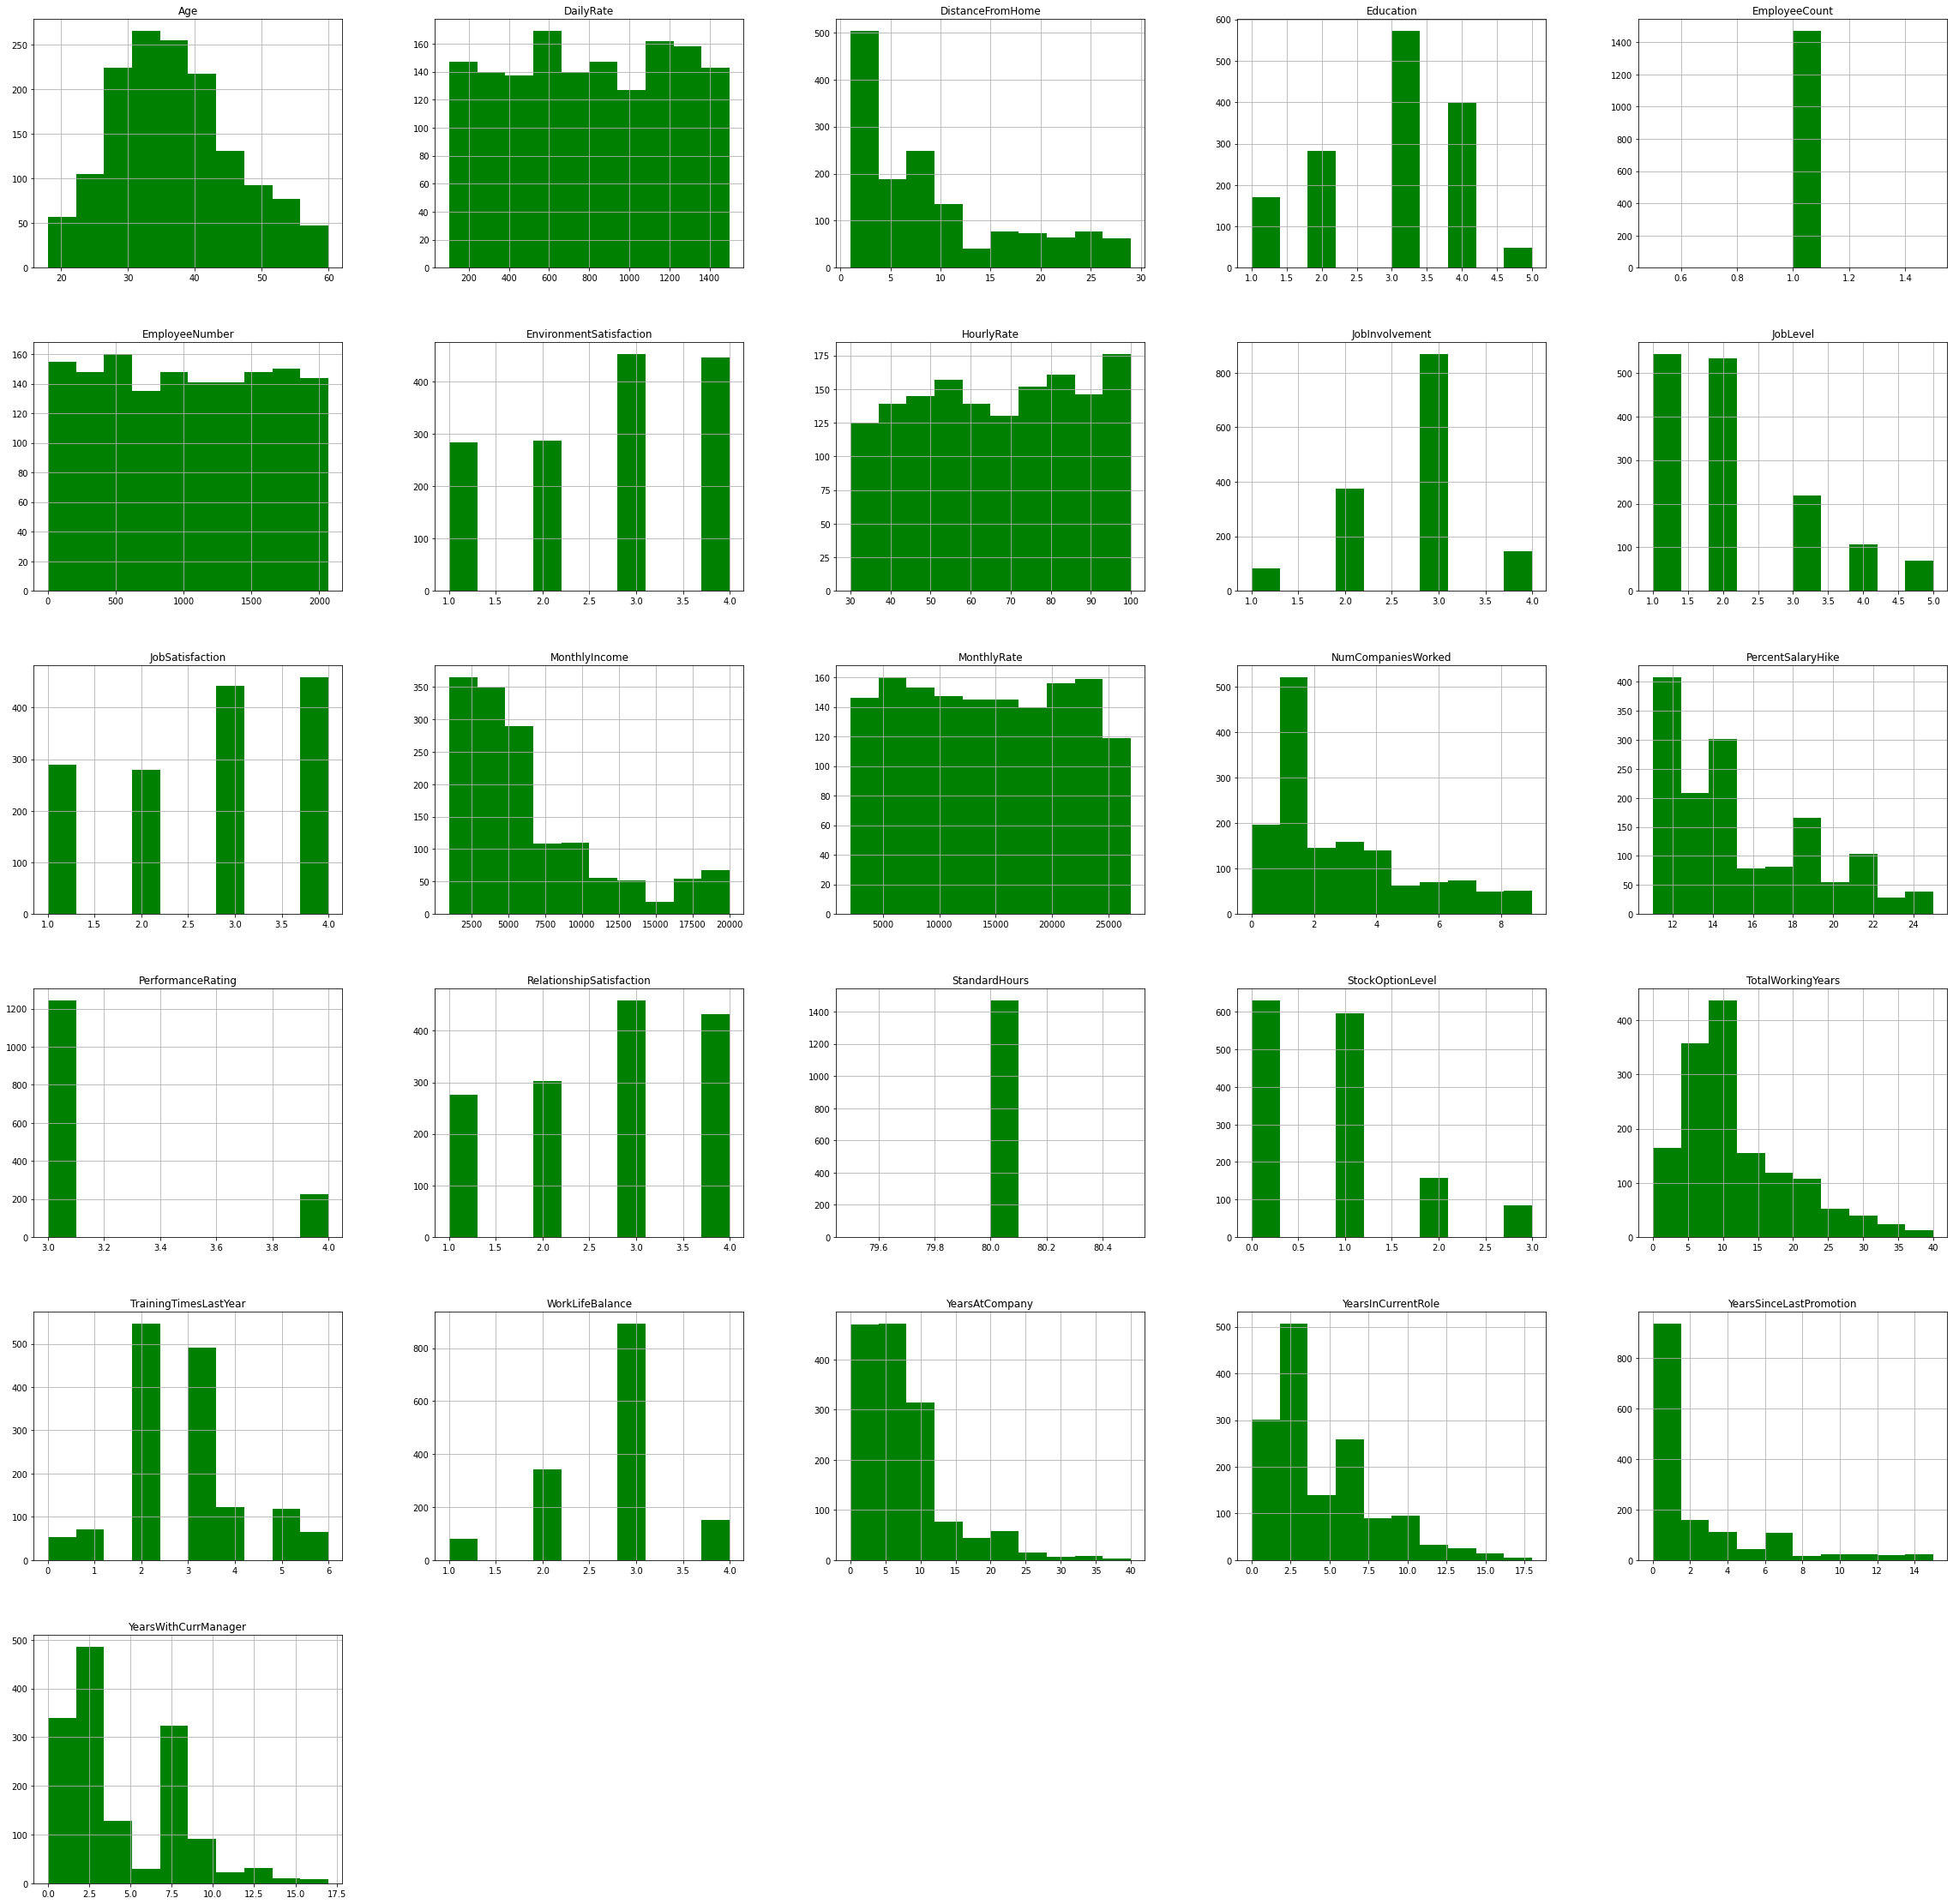

In [242]:
# plot histogram for numeric columns
df.hist(figsize=(40,40), color = 'g')
plt.show()

# 3. Statistical Analysis of Individual Features



# Monthly Income


*   Employee Monthly Income varies from 1,009 to 19,999.
*   The average monthly income of EX-employees is $4787.09.

*   The average monthly income of current employees is $6832.74.





In [243]:
# Monthly Income
print("Highest monthly Income: ${}. ".format(df['MonthlyIncome'].max()))
print("Lowest monthly Income  ${}. ".format(df['MonthlyIncome'].min()))

Highest monthly Income: $19999. 
Lowest monthly Income  $1009. 


In [244]:
# Ex-Employees
print("Average monthly income of Ex-qmployees is ${:1.2f}".format(np.mean(df.loc[df['Attrition'] == 'Yes', 'MonthlyIncome'])))
print("Standard Deviation(Ex-employees): ${:1.2f}".format(np.std(df.loc[df['Attrition'] == 'Yes', 'MonthlyIncome'])))

Average monthly income of Ex-qmployees is $4787.09
Standard Deviation(Ex-employees): $3632.52


In [245]:

# Current Employees
print("Average monthly income of current employees is ${:1.2f}".format(np.mean(df.loc[df['Attrition'] == 'No', 'MonthlyIncome'])))
print("Standard Deviation(current employees) ${:1.2f}".format(np.std(df.loc[df['Attrition'] == 'No', 'MonthlyIncome'])))

Average monthly income of current employees is $6832.74
Standard Deviation(current employees) $4816.25


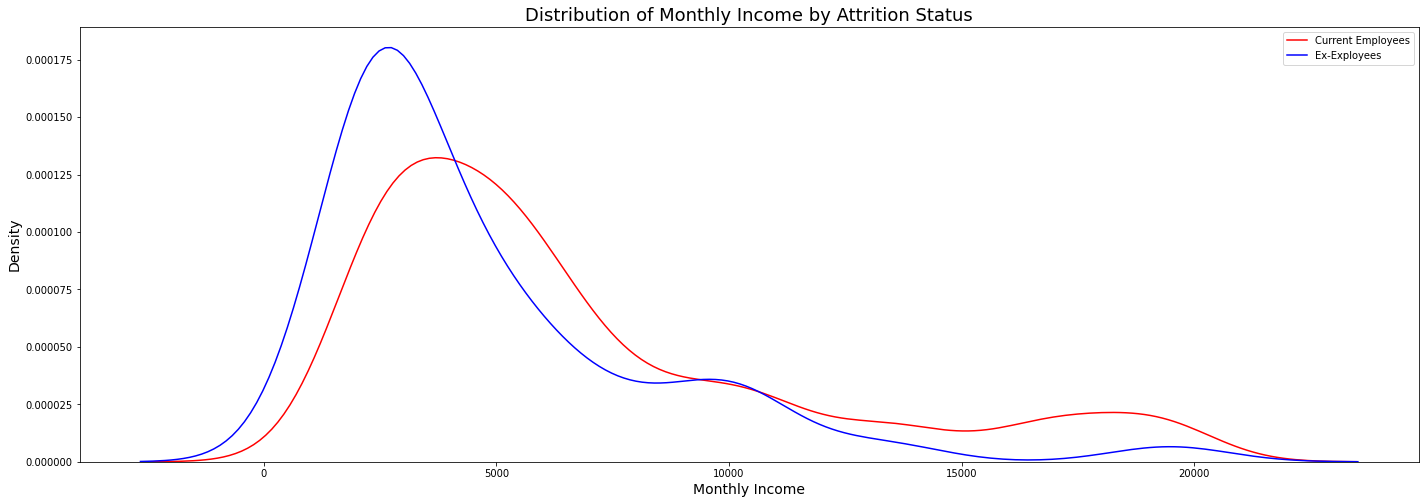

In [246]:
# kernel density estimation (KDE) plot 

#import warnings
#warnings.filterwarnings(action='ignore', category=FutureWarning)

plt.subplots(figsize=(24,8))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.distplot(target_0[["MonthlyIncome"]], hist=False, label="Current Employees", color="r")
sns.distplot(target_1[["MonthlyIncome"]], hist=False, label="Ex-Exployees", color="b")
plt.legend()
plt.xlabel("Monthly Income", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Distribution of Monthly Income by Attrition Status", fontsize=18)
plt.show()

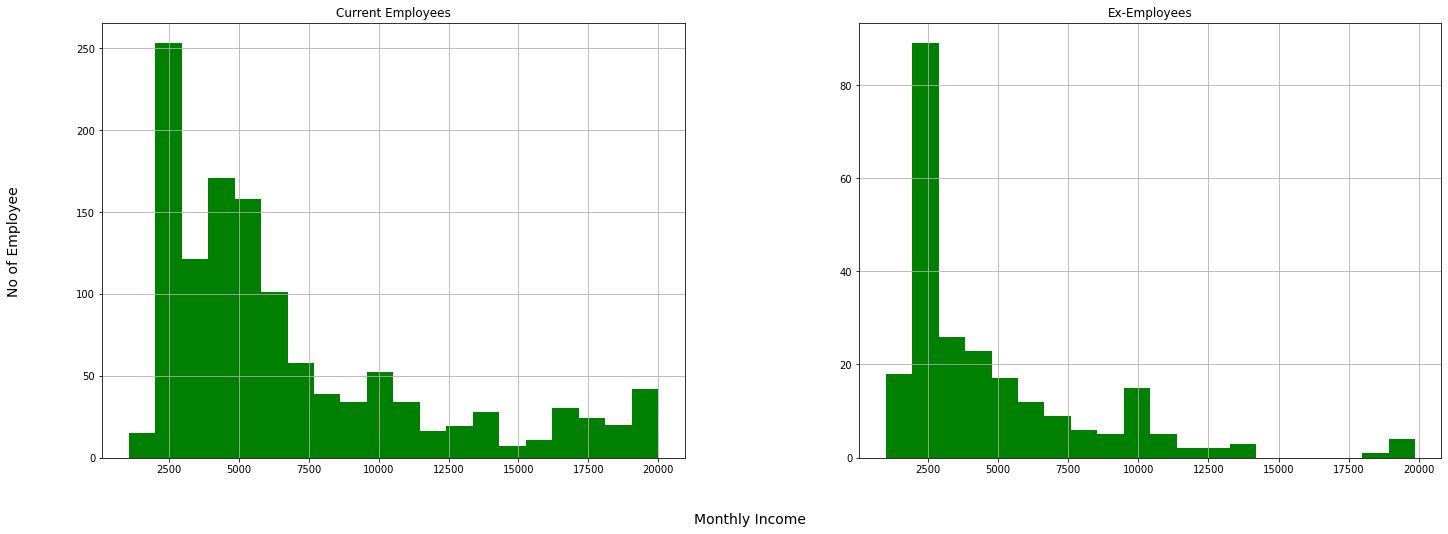

In [247]:

# plot histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(24,8)

target_0[['MonthlyIncome']].hist(bins=20, ax=axes[0], color = 'g')
axes[0].set_title('Current Employees')

target_1[['MonthlyIncome']].hist(bins=20, ax=axes[1], color = 'g')
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'Monthly Income', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)
plt.show()

# Overtime
Comparison of overtime between ex-employees and current employees indicates that a significant portion of employees with overtime left the company.

In [248]:
# breakdown by overtime
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

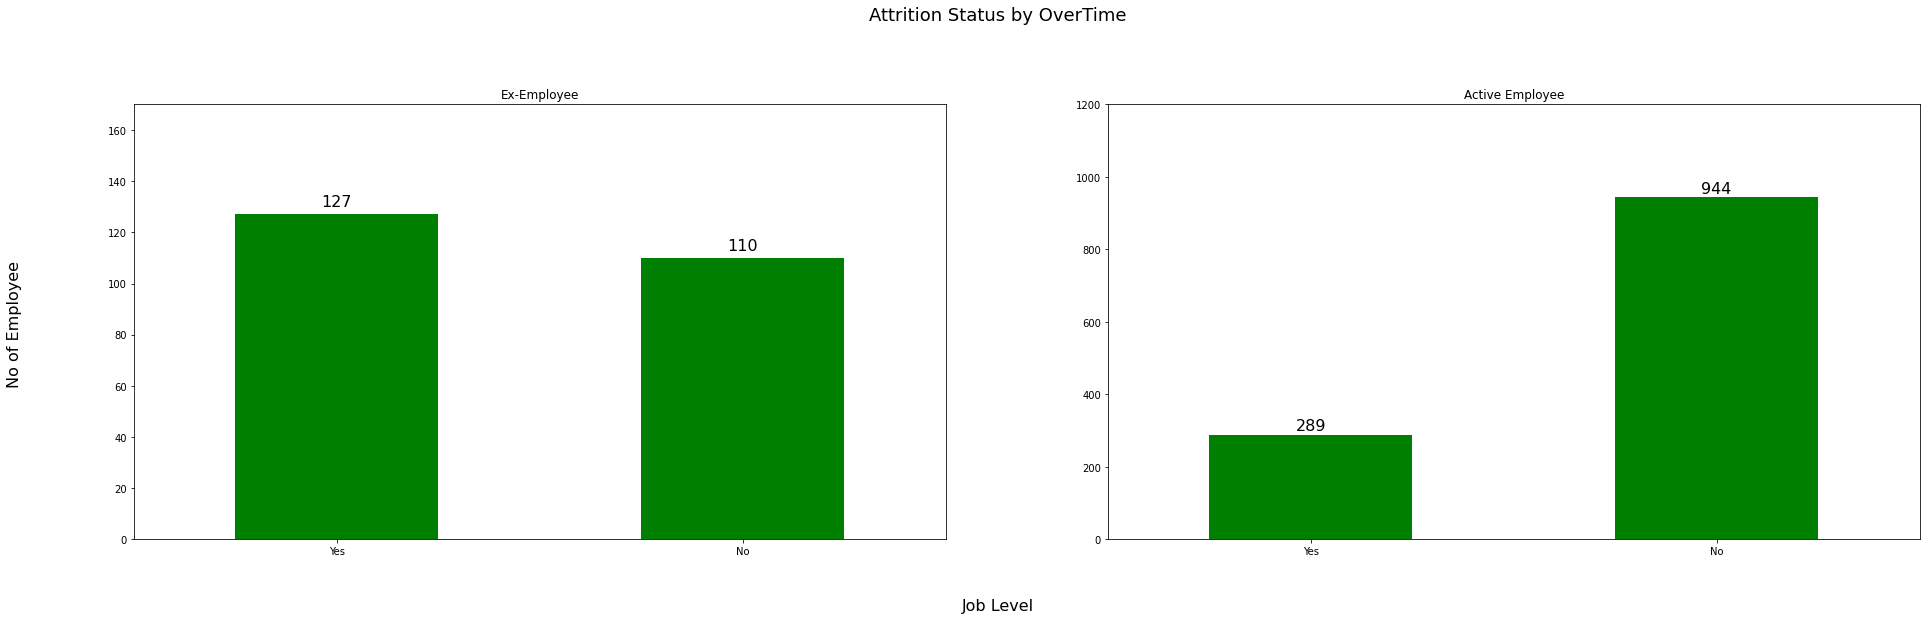

In [249]:
fig, axes = plt.subplots(figsize=(32,8))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'OverTime'].value_counts().plot.bar(title= 'Ex-Employee', color="g")
plt.xticks(rotation=0)
plt.ylim(0,170)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=16) 

plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'OverTime'].value_counts().reindex(["Yes", "No"]).plot.bar(title= 'Active Employee', color="g")
plt.xticks(rotation=0)
plt.ylim(0,1200)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=16) 

# set title and axis labels
plt.suptitle('Attrition Status by OverTime', x=0.5, y=1.05, ha="center", fontsize=18)
fig.text(0.5, 0.001, 'Job Level', ha='center', fontsize=16)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=16)
plt.show()

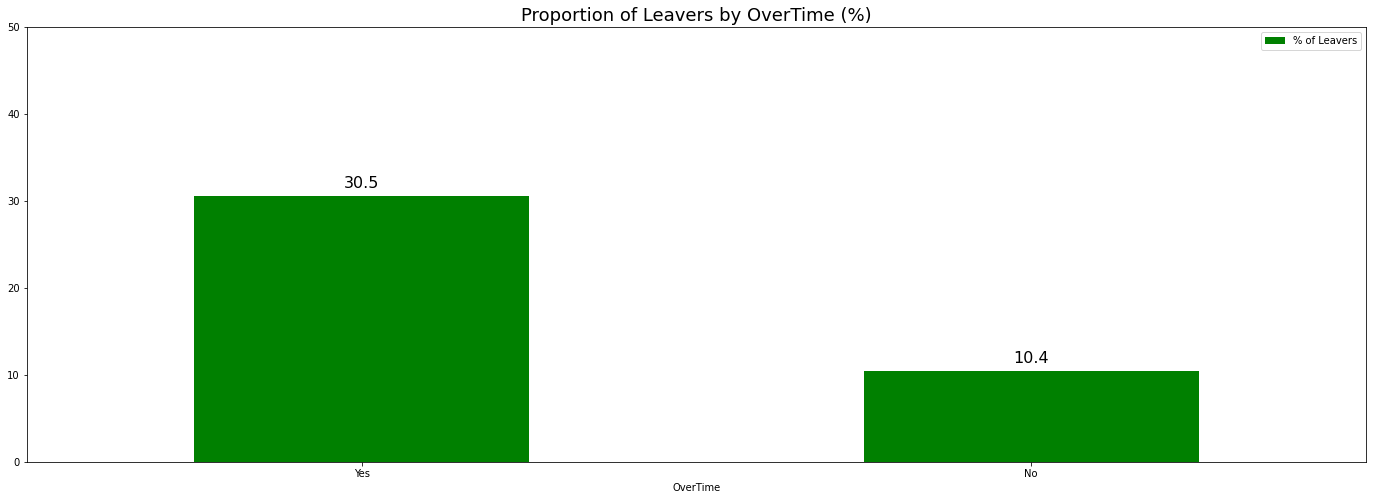

In [250]:
df_OverTime = pd.DataFrame(columns=["OverTime", "% of Leavers"])
i=0
for field in list(df['OverTime'].unique()):
    ratio = df[(df['OverTime']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['OverTime']==field].shape[0]
    df_OverTime.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_OT = df_OverTime.groupby(by="OverTime").sum()
g = df_OT.sort_values(by=['% of Leavers'], ascending=False).plot(kind='bar', figsize=(24,8), color = 'g')
plt.ylim(0,50)
plt.title("Proportion of Leavers by OverTime (%)",  fontsize=18)
plt.xticks(rotation=0)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height+1, "{:1.1f}".format(height), ha="center", fontsize=16) 

plt.show()

# Age

*   Age of emplyees are all within the range of 18-60 years old.

*   The average age of EX-employees is 33.6 years old. 

*   The average age of current employees is 37.6 years old.

In [251]:
# Age
print("The oldest employee is {} years old.".format(df['Age'].max() ))
print("The oldest employee is {} years old.".format(df['Age'].min() ))

The oldest employee is 60 years old.
The oldest employee is 18 years old.


In [252]:
# Ex-Employees
print("Average age of Ex-employees is {:1.1f}".format(np.mean(df.loc[df['Attrition'] == 'Yes', 'Age'])))
print("Standard Deviation(Ex-employees): {:1.1f}".format(np.std(df.loc[df['Attrition'] == 'Yes', 'Age'])))

Average age of Ex-employees is 33.6
Standard Deviation(Ex-employees): 9.7


In [253]:
# Current Employees
print("Active Employees:")
print("Average age of current employees is {:1.1f}".format(np.mean(df.loc[df['Attrition'] == 'No', 'Age'])))
print("Standard Deviation(current employees): {:1.1f}".format(np.std(df.loc[df['Attrition'] == 'No', 'Age'])))

Active Employees:
Average age of current employees is 37.6
Standard Deviation(current employees): 8.9


Below is a plot of age distribution colored by attrition status(current employees vs ex_employees) A kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Density plots are representations of the underlying distribution.

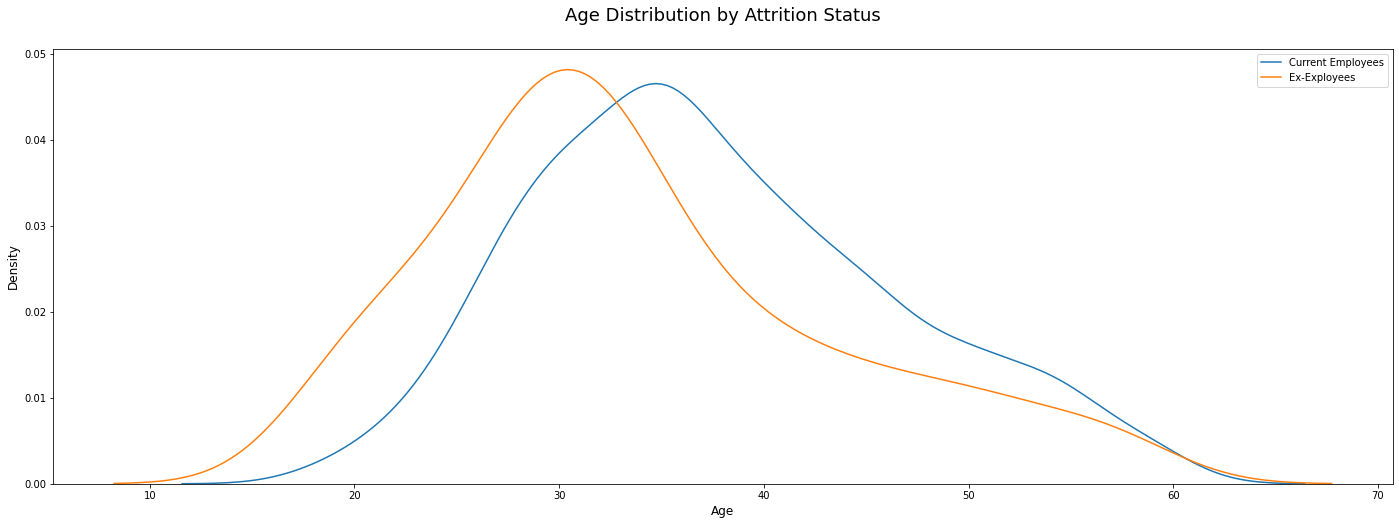

In [254]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(24,8))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.distplot(target_0[["Age"]], hist=False, label="Current Employees")
sns.distplot(target_1[["Age"]], hist=False, label="Ex-Exployees")
plt.legend()
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Age Distribution by Attrition Status", x=0.5, y=1.05, ha="center", fontsize=18)
plt.show()

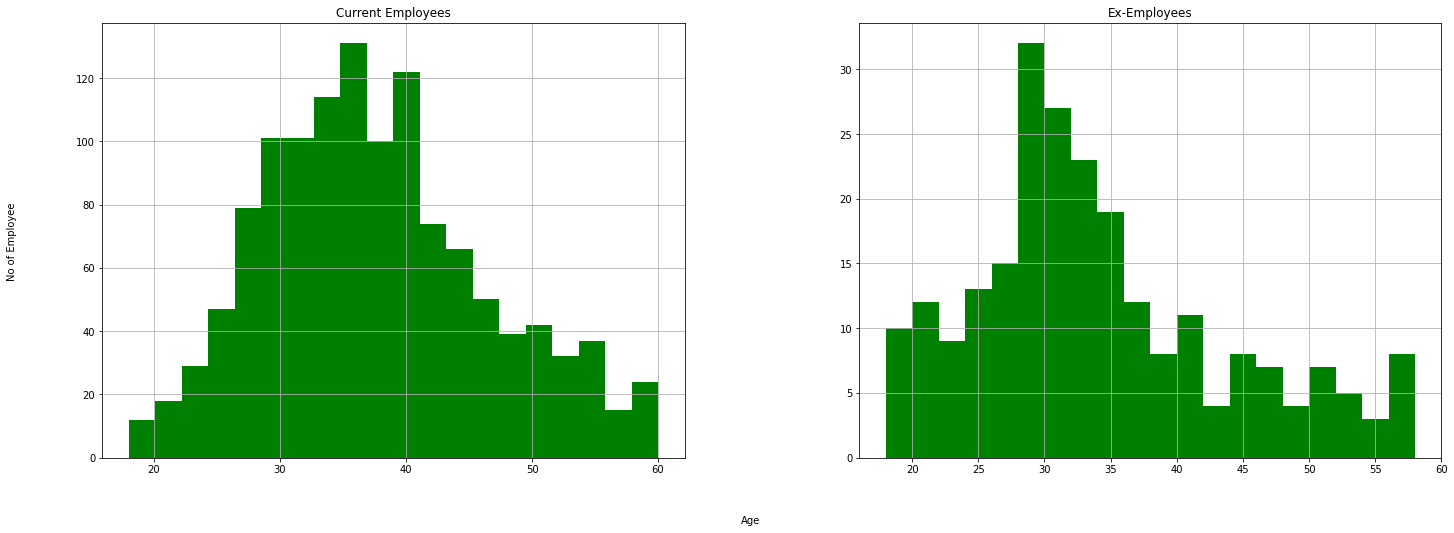

In [255]:
# plot histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(24,8)

target_0[['Age']].hist(bins=20, ax=axes[0], color = 'g')
axes[0].set_title('Current Employees')

target_1[['Age']].hist(bins=20, ax=axes[1], color = 'g')
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'Age', ha='center')
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical')
plt.show()

# Correlation
Examine some of the most significant correlations between the features and calculate the correlation matrix

In [256]:
# Find correlations with the target and sort
df_corr = df.copy()
df_corr['Target'] = df_corr['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
df_corr = df_corr.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
correlations = df_corr.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


In [257]:
# compute the correlation matrix
corr = df_corr.corr()
corr

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Target
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.103481
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.159840


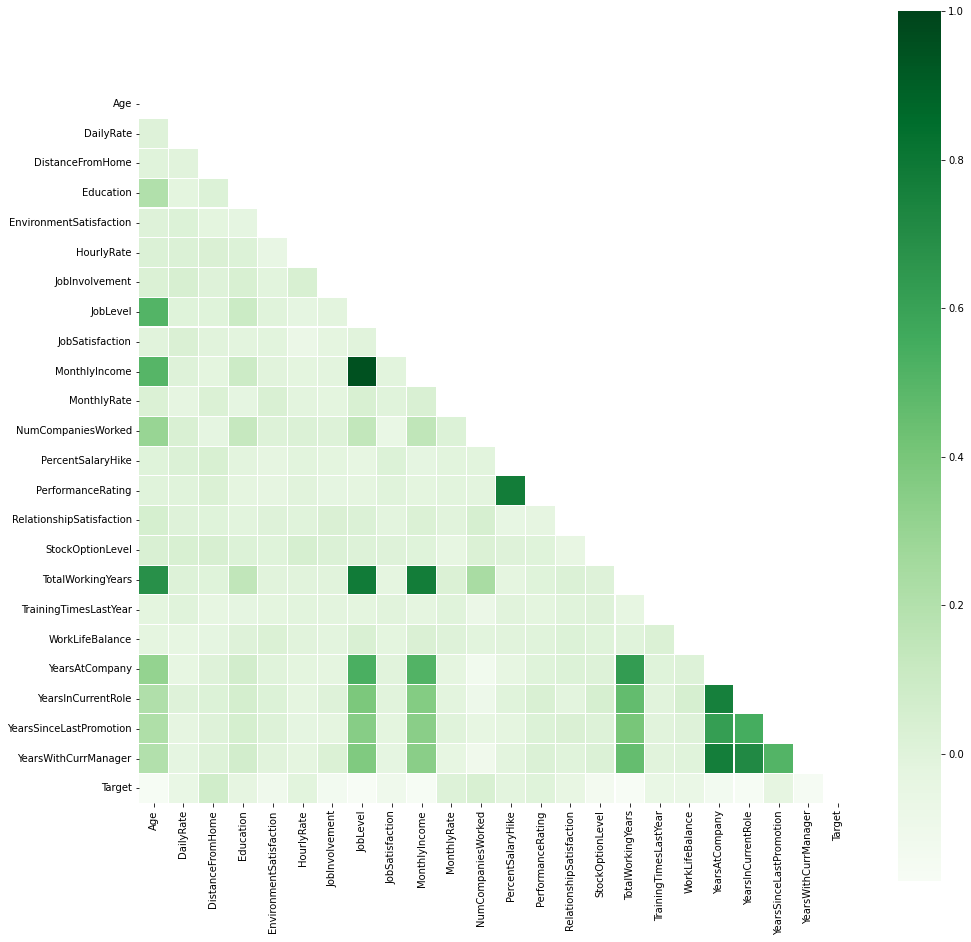

In [258]:
# set figure size
plt.figure(figsize=(16, 16))

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = sns.heatmap(corr, vmax=1, square=True, cmap="Greens", linewidths=.1, annot=False, mask=mask)
plt.show()

# 4.Data Pre-processing 
In this section, dataset is pre-processed via encoding, splitting training and testing sets as well as feature scaling to prepare for machine learning algorithm implementation.

# Encoding



In [259]:
from sklearn.preprocessing import LabelEncoder
#  reate a label encoder object
le = LabelEncoder()

#Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df.columns:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

4 columns were label encoded.


In [260]:
# convert rest of categorical variable into dummy
df = pd.get_dummies(df)

# Splitting dataset into training and testing sets

In [261]:
from sklearn.model_selection import train_test_split
# assign the target to a new dataframe and convert it to a numerical type
y = df['Attrition']

# remove the target and redundant features from the dataset
X = df.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

#since class imblanace is observed in the dataset, use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

# Feature Scaling

In [262]:
from sklearn.preprocessing import MinMaxScaler

# define the scaler 
scaler = MinMaxScaler(feature_range=(0, 1))

# fit the scaler on the TRAINING data and use the scaler to transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# use the scaler to transform the TEST data
X_test_scaled = scaler.transform(X_test)

# 5.Machine Learning Model Selection and Optimization


# Baseline Algorithms





*   A range of baseline algorithms(with default hyper-parameters) are used for comparison between difference machine learning models before proceeding to fine tune optimal machine learning models with GridSearchCV. Machine learning models used for comparison are: Logistic Regression, Random Forest and XGBoost.
*  Classification accuracy and area under the ROC curve (AUC) are used for evaluating performance of the machine learning models.







In [263]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [264]:
# selection of algorithms to consider
models = []
models.append(("Logistic Regression", LogisticRegression(solver="liblinear", random_state=0)))
models.append(("Random Forest", RandomForestClassifier(n_estimators=100, random_state=0)))
models.append(("XGBoost", XGBClassifier(random_state=0)))

# evaluate each model in turn and provide accuracy and standard deviation scores
acc_results = []
auc_results = []
names = []

# set table to table to populate with performance results
col = ["Algorithm", "ROC AUC Mean", "ROC AUC STD", "Accuracy Mean", "Accuracy STD"]
df_results = pd.DataFrame(columns=col)
i = 0

# evaluate each model using cross-validation
for name, model in models:
    # 10-fold cross-validation
    kfold = KFold(n_splits=10, random_state=0)  

    # accuracy scoring
    cv_acc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")

    # roc_auc scoring
    cv_auc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="roc_auc")

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

In [265]:
# sort the results by Accuracy
df_results.sort_values(by=["Accuracy Mean"], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
2,XGBoost,79.92,7.69,87.12,2.19
0,Logistic Regression,80.45,6.48,86.39,3.01
1,Random Forest,79.10,5.65,85.85,4.26


In [266]:
# sort the results by ROC AUC
df_results.sort_values(by=["ROC AUC Mean"], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,80.45,6.48,86.39,3.01
2,XGBoost,79.92,7.69,87.12,2.19
1,Random Forest,79.10,5.65,85.85,4.26


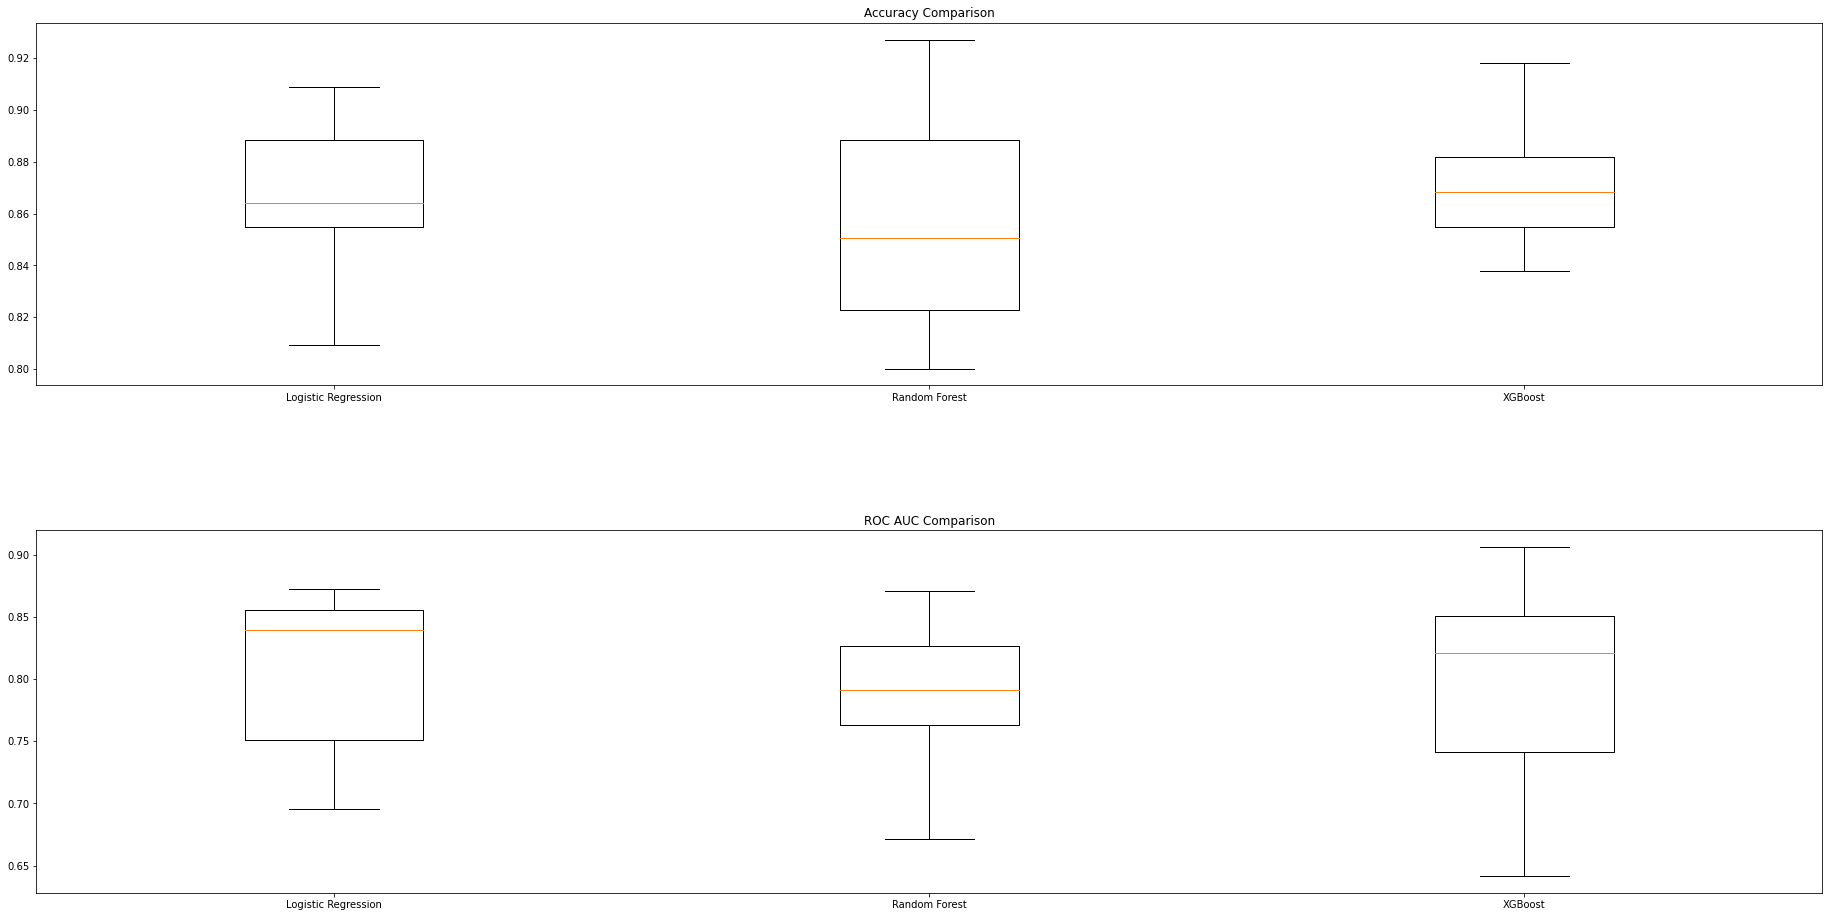

In [267]:
fig = plt.figure(figsize=(32, 16))

ax1 = fig.add_subplot(211)
plt.boxplot(acc_results)
ax1.set_xticklabels(names)
plt.title("Accuracy Comparison")

fig.subplots_adjust(hspace=0.4)

ax2 = fig.add_subplot(212)
plt.boxplot(auc_results)
ax2.set_xticklabels(names)
plt.title("ROC AUC Comparison")

# plt.savefig("boxplots.png", bbox_inches="tight")
plt.show()

Based on our Accuracy and ROC AUC comparison analysis, both Logistic Regression and XGBoost have high mean Accuracy score and mean AUC score. XGBoost will be fine-tuned to further improve the performance of our machine leanring model.

# XGBoost

In [268]:
kfold = KFold(n_splits=10, random_state=0)
modelCV = XGBClassifier(random_state=0)
scoring = 'roc_auc'
results = cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("Average AUC score = {:1.4f}; standard deviation = {:1.4f}".format(results.mean(), results.std()))

Average AUC score = 0.7992; standard deviation = 0.0769


Fine-tune using GridSearchCV (sweep over specified hyper-parameter values to search for optimal hyper-parameters)

In [269]:
#use GridSearchCV to fine_tune XGB classifier
xgb_classifier = XGBClassifier(random_state=0)

param_grid = {"n_estimators": [100, 150, 200],
              "max_depth": [2, 3, 4],
              "learning_rate":[0.01, 0.1],
              "gamma": [1,2,3]}

xgb_clf = GridSearchCV(xgb_classifier,
                        param_grid=param_grid,
                        scoring="roc_auc",
                        cv=10)

xgb_clf.fit(X_train, y_train)

print("best estimator: " + str(xgb_clf.best_estimator_))
print("best params: " + str(xgb_clf.best_params_))
print("best score:", xgb_clf.best_score_)


best estimator: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=2,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
best params: {'gamma': 2, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150}
best score: 0.8148919689427899


In [270]:
# get feature importances
importances = xgb_clf.best_estimator_.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(len(X_train.columns)):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,OverTime,0.062861
1,JobLevel,0.059392
2,MonthlyIncome,0.045607
3,Age,0.042721
4,StockOptionLevel,0.041872
5,JobRole_Sales Representative,0.040170
6,TotalWorkingYears,0.039545
7,YearsWithCurrManager,0.034822
8,EducationField_Medical,0.034503
9,JobRole_Laboratory Technician,0.033721


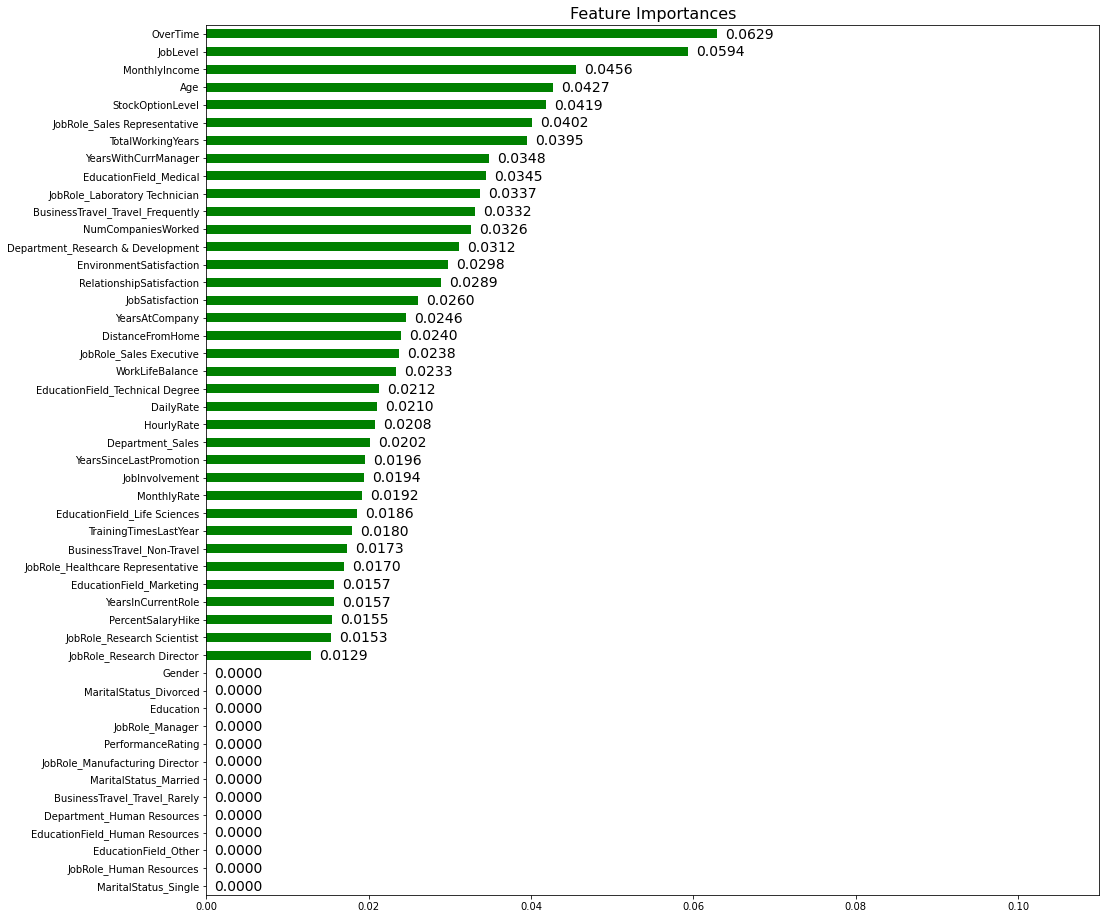

In [271]:
# plot feature importances
plt.figure(figsize=(16,16))
plt.title("Feature Importances", fontsize=16)
plt.xlim(0,0.11)
feat_importances = pd.Series(xgb_clf.best_estimator_.feature_importances_, index=X_train.columns)
g1 = feat_importances.sort_values().plot(kind="barh", color="g")
for i in g1.patches:
    # get_width pulls left or right; get_y pushes up or down
    g1.text(i.get_width()+.001, i.get_y()+.0, "{:1.4f}".format(i.get_width()), fontsize=14)
    
plt.show()

In [272]:
# make predictions
y_pred = xgb_clf.predict(X_test)

# calculate accuracy score
xgb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of XGBoost Classifier on test set: {:.2f}%'.format(xgb_accuracy*100))

Accuracy of XGBoost Classifier on test set: 88.04%


In [273]:
# calculate AUC score using test dataset
y_pred_prob = xgb_clf.predict_proba(X_test)[:, 1]
xgb_roc_auc = roc_auc_score(y_test, y_pred_prob)

print("AUC on test set: {}".format(xgb_roc_auc))

AUC on test set: 0.8218967692392081


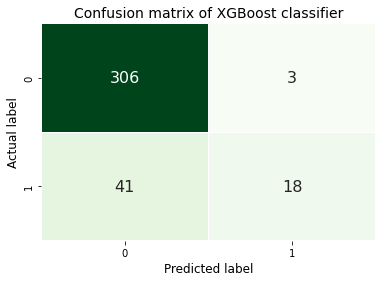

In [274]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Greens")
plt.title('Confusion matrix of XGBoost classifier', fontsize=14)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()


The Confusion matrix indicates 306+18 correct predictions and 41+3 incorrect predictions, which translates to an accuracy of 88.04%

# ROC curve

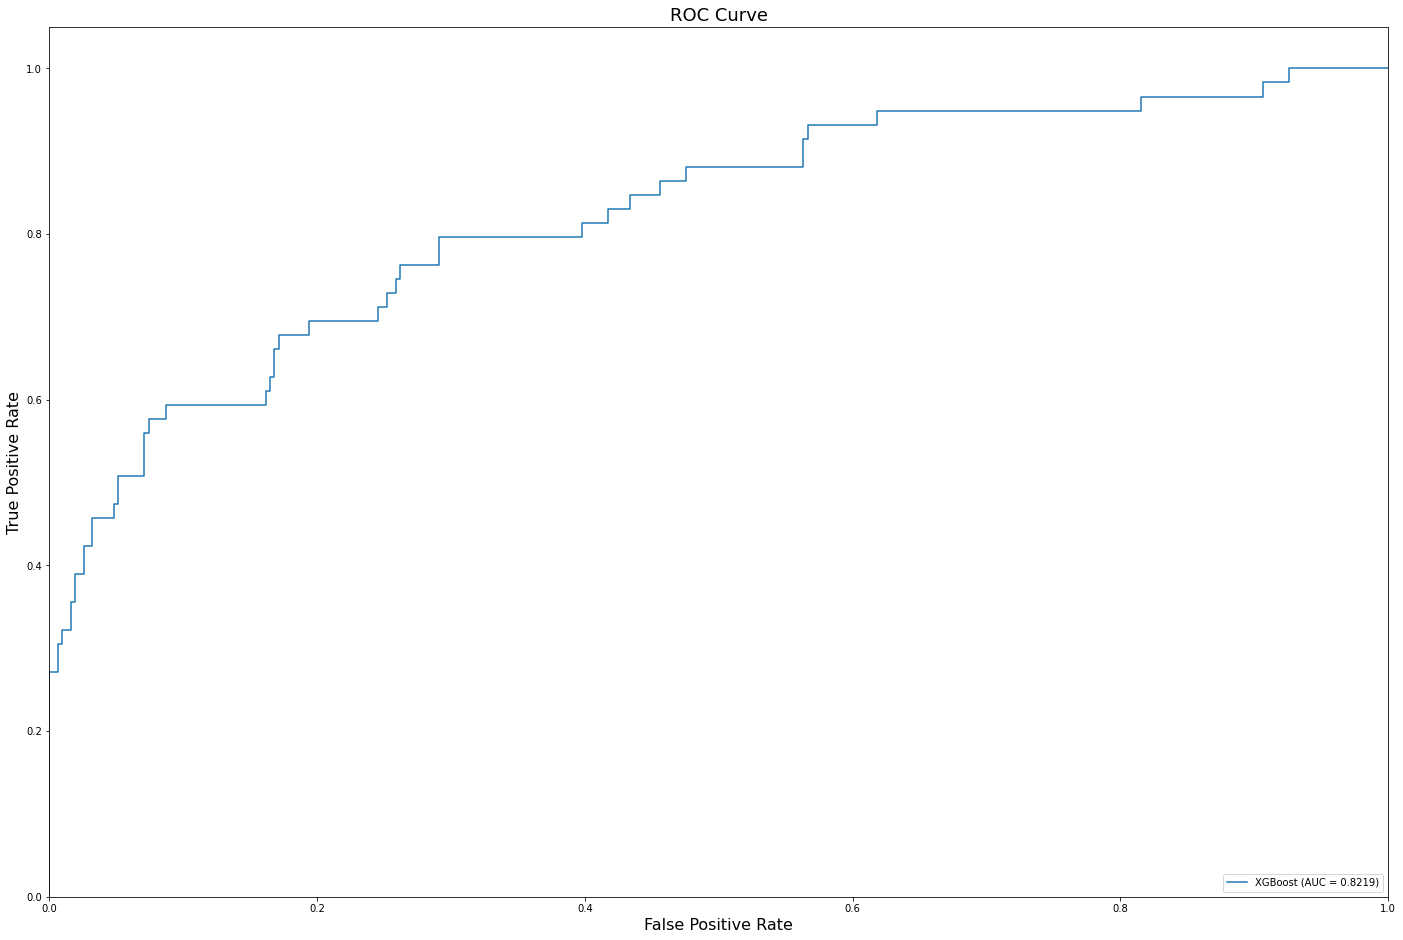

In [275]:
from sklearn.metrics import roc_curve
#plot the roc curve
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:,1])
plt.figure(figsize=(24, 16))

# plot XGBoost ROC
plt.plot(xgb_fpr, xgb_tpr, label="XGBoost (AUC = {:1.4f})".format(xgb_roc_auc))


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.title("ROC Curve", fontsize=18)
plt.legend(loc="lower right")
plt.show()

# 6.Discussion
Comparing the 3 machine learning models(Logistic Regression, Random Forest and XGboost), both Logistic Regression and XGBoost have high accuracy score and  AUC score. After fine tunning the hyper-parameters, noticable performace improvement was seen in XGBoost model with accuracy score increased to 88.04% from 87.12% and a 1.8% incease in ROC AUC from 0.7992 to 0.8141. Benefiting from its regularized model formation techqniques, XGBoost has better control over over-fitting and thus returns better modeling and prediction performance compared to other machine learning models.
# Indicators and Retention Plan
The stronger indicators of employee leaving the company include:

*   Over Time: Employees who work overtime are more likely to leave the company compared those who don't. Hence efforts must be taken to appropriately scope projects upfront with adequate support and manpower so as to appropriately distribute workload and reduce the use of overtime.
*   Joblevel: Employeed on higher job levels are less likely to leave compared to leave. Employees on lower job levels should be identified as having higher-risk of leaving, measures such as employee retention programs can be implemented to reduce the attrition rate of lower joblevel employees.
*  Monthly Income: Employees on higher wages are less likely to leave the company. Hence, efforts should be made to gather information on industry benchmarks in the current local market to determine if the company is providing competitive wages, especially for positions/ specialities with lower income.
*   Age: Employees in relatively young age bracket 25–35 are more likely to leave. Hence, efforts should be made to clearly articulate the long-term vision of the company and young employees fit in that vision, as well as provide incentives in the form of clear paths to promotion for instance.

*   TotalWorkingYears: The more experienced employees are less likely to leave. Employees who have between 5–8 years of experience should be identified as potentially having a higher-risk of leaving.






